# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

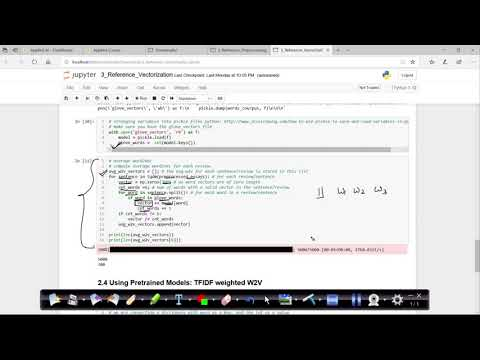

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

In [ ]:
from google.colab import drive
import shutil
import pickle
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import plotly.offline as offline
import plotly.graph_objs as go
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import numpy as np
offline.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
nltk.download('vader_lexicon')
shutil.copy("/content/drive/MyDrive/MachineLearning/ColabNotebooks/9-Assignment/glove_vectors", "/content")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


'/content/glove_vectors'

In [ ]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

1. Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets
> * Set 1: categorical, numerical features + preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)
> * Set 2: categorical, numerical features + preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)

In [ ]:
# Loading data

data = pd.read_csv('/content/drive/MyDrive/MachineLearning/ColabNotebooks/9-Assignment/preprocessed_data.csv')

In [ ]:
# separating target variable from other variables in the dataset
label = data['project_is_approved'].values
data = data.drop('project_is_approved',axis=1)
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [ ]:
sid = SentimentIntensityAnalyzer()
data['neg'] = data['essay'].apply(lambda X:sid.polarity_scores(X)['neg'])
data['neu'] = data['essay'].apply(lambda X:sid.polarity_scores(X)['neu'])
data['pos'] = data['essay'].apply(lambda X:sid.polarity_scores(X)['pos'])
data['compound'] = data['essay'].apply(lambda X:sid.polarity_scores(X)['compound'])

In [ ]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.783,0.205,0.9867
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.072,0.680,0.248,0.9897
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,0.017,0.721,0.262,0.9860
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,0.030,0.783,0.187,0.9524
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,0.029,0.683,0.288,0.9873


In [ ]:
X=data
y=label

In [ ]:
# Splitting data into train and test data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,stratify=y)
#printing the shapes of both train and test data
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(73196, 12) (36052, 12)
(73196,) (36052,)


Feature Essay TFIDF

In [ ]:
vect_tfidf = TfidfVectorizer(min_df=10,max_features=5000)
vect_tfidf.fit(X_train['essay'].values)
X_train_essay_tfidf = vect_tfidf.transform(X_train['essay'].values) 
X_test_essay_tfidf = vect_tfidf.transform(X_test['essay'].values)
print(X_train_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)

(73196, 5000)
(36052, 5000)


Feature Essay TFIDF W2V

In [ ]:
dictionary = dict(zip(vect_tfidf.get_feature_names(), list(vect_tfidf.idf_)))
tfidf_words = set(vect_tfidf.get_feature_names())

In [ ]:
from tqdm import tqdm
# average Word2Vec
# compute average word2vec for each review.
X_train_tfidf_w2v_vectors_essay= []
X_test_tfidf_w2v_vectors_essay = []
#  the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors_essay.append(vector)

100%|██████████| 73196/73196 [02:43<00:00, 448.59it/s]


In [ ]:
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors_essay.append(vector)

100%|██████████| 36052/36052 [01:22<00:00, 435.03it/s]


In [ ]:
X_train_tfidf_w2v_vectors_essay = np.array(X_train_tfidf_w2v_vectors_essay)
X_test_tfidf_w2v_vectors_essay = np.array(X_test_tfidf_w2v_vectors_essay)

In [ ]:
print(X_train_tfidf_w2v_vectors_essay.shape)
print(X_test_tfidf_w2v_vectors_essay.shape)

(73196, 300)
(36052, 300)


Converting Categorical features to Vectors

In [ ]:
# Feature 'school_state' 
vect = CountVectorizer()
vect.fit(X_train['school_state'].values)
X_train_school_state = vect.transform(X_train['school_state'].values)
X_test_school_state = vect.transform(X_test['school_state'].values)
print(X_train_school_state.shape)
print(X_test_school_state.shape)

(73196, 51)
(36052, 51)


In [ ]:
# Feature 'teacher_prefix' 
vect = CountVectorizer()
vect.fit(X_train['teacher_prefix'].values)
X_train_teacher_prefix = vect.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix = vect.transform(X_test['teacher_prefix'].values)
print(X_train_teacher_prefix.shape)
print(X_test_teacher_prefix.shape)

(73196, 5)
(36052, 5)


In [ ]:
# Feature 'project_grade_category' 
vect = CountVectorizer()
vect.fit(X_train['project_grade_category'].values)
X_train_project_grade_category = vect.transform(X_train['project_grade_category'].values)
X_test_project_grade_category = vect.transform(X_test['project_grade_category'].values)
print(X_train_project_grade_category.shape)
print(X_test_project_grade_category.shape)

(73196, 4)
(36052, 4)


In [ ]:
# Feature 'clean_categories' 
vect = CountVectorizer()
vect.fit(X_train['clean_categories'].values)
X_train_clean_categories = vect.transform(X_train['clean_categories'].values)
X_test_clean_categories = vect.transform(X_test['clean_categories'].values)
print(X_train_clean_categories.shape)
print(X_test_clean_categories.shape)

(73196, 9)
(36052, 9)


In [ ]:
# Feature 'clean_subcategories'
vect = CountVectorizer()
vect.fit(X_train['clean_subcategories'].values)
X_train_clean_subcategories	 = vect.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories	 = vect.transform(X_test['clean_subcategories'].values)
print(X_train_clean_subcategories.shape)
print(X_test_clean_subcategories.shape)

(73196, 30)
(36052, 30)


In [ ]:
# Feature 'price'
norm = Normalizer()
norm.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = norm.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = norm.transform(X_test['price'].values.reshape(-1,1))
print(X_train_price_norm.shape)
print(X_test_price_norm.shape)

(73196, 1)
(36052, 1)


In [ ]:
# Feature 'teacher_number_of_previously_posted_projects'
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_previous_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previous_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(X_train_previous_projects_norm.shape)
print(X_test_previous_projects_norm.shape)

(73196, 1)
(36052, 1)


In [ ]:
X_train_numerical = X_train[['neg','neu','pos','compound']]
X_test_numerical = X_test[['neg','neu','pos','compound']]

SET 1 Train and Test data after converting features into vectors


In [ ]:
from scipy.sparse import hstack

X_tr = hstack((X_train_school_state,X_train_teacher_prefix,X_train_project_grade_category,X_train_clean_categories,X_train_clean_subcategories,X_train_essay_tfidf,X_train_numerical,X_train_price_norm,X_train_previous_projects_norm)).tocsr()
X_te = hstack((X_test_school_state,X_test_teacher_prefix,X_test_project_grade_category,X_test_clean_categories,X_test_clean_subcategories,X_test_essay_tfidf,X_test_numerical,X_test_price_norm,X_test_previous_projects_norm)).tocsr()

In [ ]:
print('trian:',X_tr.shape)
print('test:',X_te.shape)

trian: (73196, 5105)
test: (36052, 5105)


SET 2 Train and Test data after converting features into vectors

In [ ]:
X_tr_tfidf_w2v = hstack((X_train_school_state,X_train_teacher_prefix,X_train_project_grade_category,X_train_clean_categories,X_train_clean_subcategories,X_train_tfidf_w2v_vectors_essay,X_train_numerical,X_train_price_norm,X_train_previous_projects_norm)).tocsr()
X_te_tfidf_w2v = hstack((X_test_school_state,X_test_teacher_prefix,X_test_project_grade_category,X_test_clean_categories,X_test_clean_subcategories,X_test_tfidf_w2v_vectors_essay,X_test_numerical,X_test_price_norm,X_test_previous_projects_norm)).tocsr()

In [ ]:
print('trian:',X_tr_tfidf_w2v.shape)
print('test:',X_te_tfidf_w2v.shape)

trian: (73196, 405)
test: (36052, 405)


##Set 1
2. The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])
>* Find the best hyper parameter which will give the maximum AUC value
 * find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)

In [ ]:
dt = DecisionTreeClassifier()
params = {'max_depth':[1,5,10,50],'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dt,params,cv=3,scoring='roc_auc',return_train_score=True,verbose=3,n_jobs=-1)
clf.fit(X_tr,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 10.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         '

3. Representation of results
>You need to plot the performance of model both on train data and cross   validation data for each hyper parameter, like shown in the figure  with X-axis as min_sample_split, Y-axis as max_depth, and Z-axis as AUC Score , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive 3d_scatter_plot.ipynb

In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.045787,0.200810,0.060037,0.022507,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.559583,0.548034,0.543221,0.550280,0.006866,10,0.547343,0.553089,0.553578,0.551337,0.002831
1,1.944487,0.745782,0.053251,0.019328,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.559583,0.548034,0.543221,0.550280,0.006866,10,0.547343,0.553089,0.553578,0.551337,0.002831
2,1.413285,0.030707,0.040806,0.000794,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.559583,0.548034,0.543221,0.550280,0.006866,10,0.547343,0.553089,0.553578,0.551337,0.002831
3,1.390491,0.011151,0.039239,0.000490,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.559583,0.548034,0.543221,0.550280,0.006866,10,0.547343,0.553089,0.553578,0.551337,0.002831
4,6.503813,0.107977,0.043861,0.001556,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.624763,0.603084,0.598728,0.608858,0.011386,7,0.618521,0.623703,0.626211,0.622812,0.003202
5,6.554952,0.101583,0.042207,0.000170,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.624772,0.603035,0.598864,0.608891,0.011359,6,0.618521,0.623655,0.626211,0.622796,0.003198
6,6.414006,0.036946,0.042991,0.000926,5,100,"{'max_depth': 5, 'min_samples_split': 100}",0.625002,0.603113,0.598581,0.608899,0.011536,4,0.618450,0.623317,0.626200,0.622656,0.003198
7,6.356223,0.064843,0.042020,0.000948,5,500,"{'max_depth': 5, 'min_samples_split': 500}",0.624949,0.603106,0.598618,0.608891,0.011502,5,0.618384,0.623273,0.625862,0.622506,0.003101
8,15.728057,0.097890,0.044579,0.002407,10,5,"{'max_depth': 10, 'min_samples_split': 5}",0.620064,0.600031,0.604074,0.608056,0.008649,8,0.662032,0.675035,0.676108,0.671058,0.006397
9,15.567849,0.173535,0.043806,0.001496,10,10,"{'max_depth': 10, 'min_samples_split': 10}",0.622478,0.602088,0.605690,0.610085,0.008885,3,0.660542,0.674032,0.674992,0.669855,0.006597


In [ ]:
best = clf.best_params_
best

{'max_depth': 10, 'min_samples_split': 500}

In [ ]:
x1=[1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
y1=[5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
z1=list(results['mean_train_score'])

x2=[1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
y2=[5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
z2=list(results['mean_test_score'])

In [ ]:
Trace1=go.Scatter3d(x=x1,y=y1,z=z1,name='Train')
Trace2=go.Scatter3d(x=x2,y=y2,z=z2,name='Cross Validation')
data=[Trace1,Trace2]

In [ ]:
layout = go.Layout(scene=dict(
    xaxis=dict(title='max_depth'),
    yaxis=dict(title='min_samples_split'),
    zaxis=dict(title='AUC_Score')))

In [ ]:
fig = go.Figure(data,layout)
fig.show(renderer='colab')

4. Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.

In [ ]:
#training decision tree classifier with best parameters
best_model = DecisionTreeClassifier(max_depth=best['max_depth'],min_samples_split=best['min_samples_split'])
best_model.fit(X_tr,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#prediciton probabilities of y_test and y_train
y_train_predict_proba =(best_model.predict_proba(X_tr))[:,1]
y_test_predict_proba = (best_model.predict_proba(X_te))[:,1]

Text(0, 0.5, 'TPR')

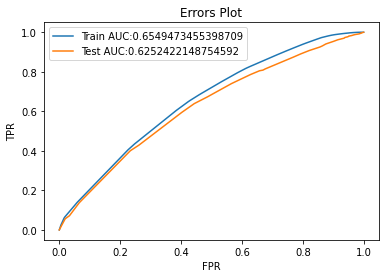

In [ ]:
#plotting roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_predict_proba)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_predict_proba)
plt.plot(train_fpr,train_tpr,label="Train AUC:"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC:"+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.title('Errors Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
tfidf_auc_score = auc(test_fpr,test_tpr)

In [ ]:
# predictions of y_train and y_test with best model
y_train_pred = best_model.predict(X_tr)
y_test_pred = best_model.predict(X_te)

Text(33.0, 0.5, 'Actual')

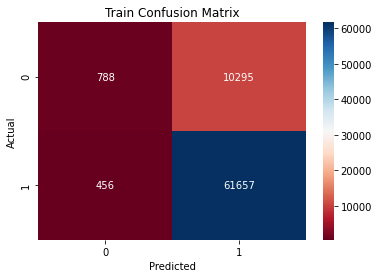

In [ ]:
# confusion matrix of train data
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.title("Train Confusion Matrix")
cm_train_tfidf=confusion_matrix(y_train,y_train_pred)
sns.heatmap(cm_train_tfidf,annot=True,fmt="d",cmap='RdBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')


Text(33.0, 0.5, 'Actual')

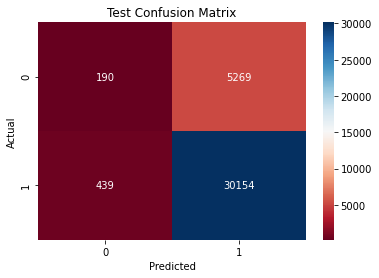

In [ ]:
#confusion matrix of test data
cm_test_tfidf=confusion_matrix(y_test,y_test_pred)
plt.title("Test Confusion Matrix")
sns.heatmap(cm_test_tfidf,annot=True,fmt="d",cmap='RdBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

* Once after you plot the confusion matrix with the test data, get all the `false positive data points`
Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`


In [ ]:
#getting all the false positive data points index
index_fpr=[]
for i in range(len(y_train)):
  if y_train[i] == 0 and y_train_pred[i]==1:
    index_fpr.append(i)
for j in range(len(y_test)):
  if y_test[j]==0 and y_test_pred[j]==1:
    index_fpr.append(j)


In [ ]:
#reference https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
def wordcloud_func(indices,stopwords=set(STOPWORDS)):
  fpr_essay = X.essay.iloc[indices]
  words = ''
  for i in fpr_essay:

    val = str(i)
    tokens = val.split()

    for j in range(len(tokens)):
      tokens[j] = tokens[j].lower()
    words += " ".join(tokens)+" "
  wordcloud = WordCloud(width=1080,height=1920, background_color ='white',stopwords = stopwords,min_font_size = 10).generate(words)
  plt.figure(figsize = (30, 10), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

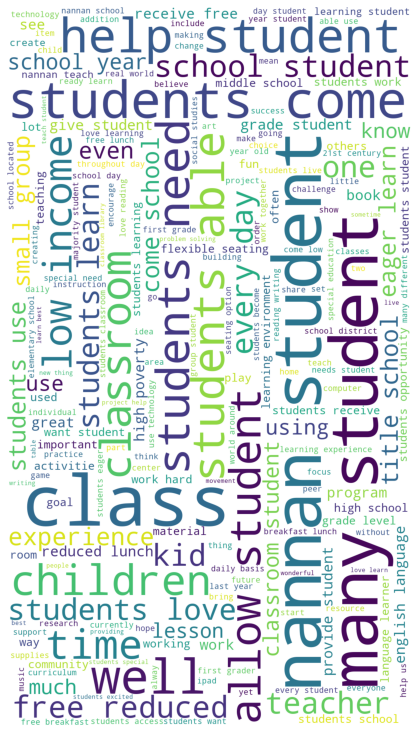

In [ ]:
#function to generate wordcloud
wordcloud_func(index_fpr)

* Plot the box plot with the `price` of these `false positive data points`


Text(0.5, 1.0, 'Price of FPR')

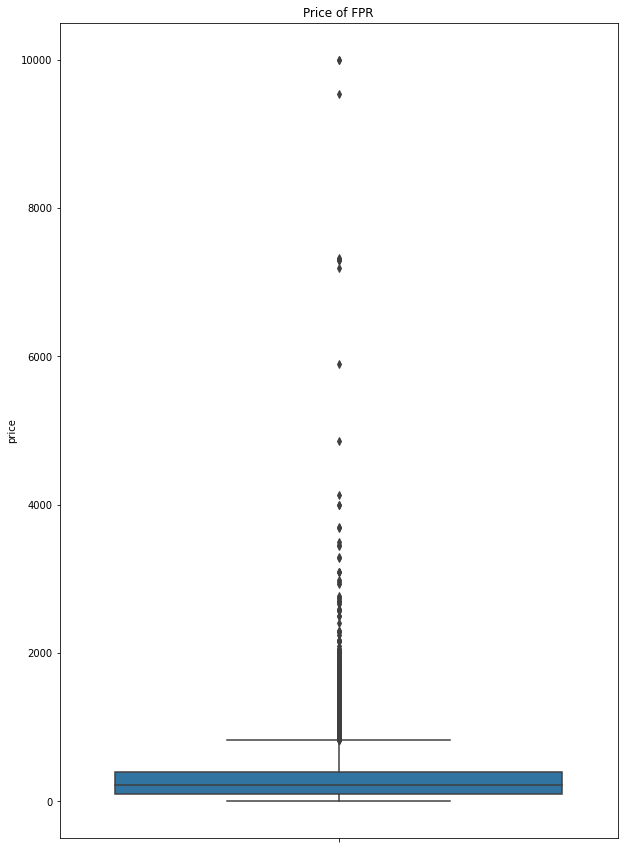

In [ ]:
price_fpr = X.price.iloc[index_fpr]
plt.figure(figsize=(10,15))
sns.boxplot(y=price_fpr,)
plt.title('Price of FPR')

* Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'teacher_number_of_previously_posted_projects of FPR')

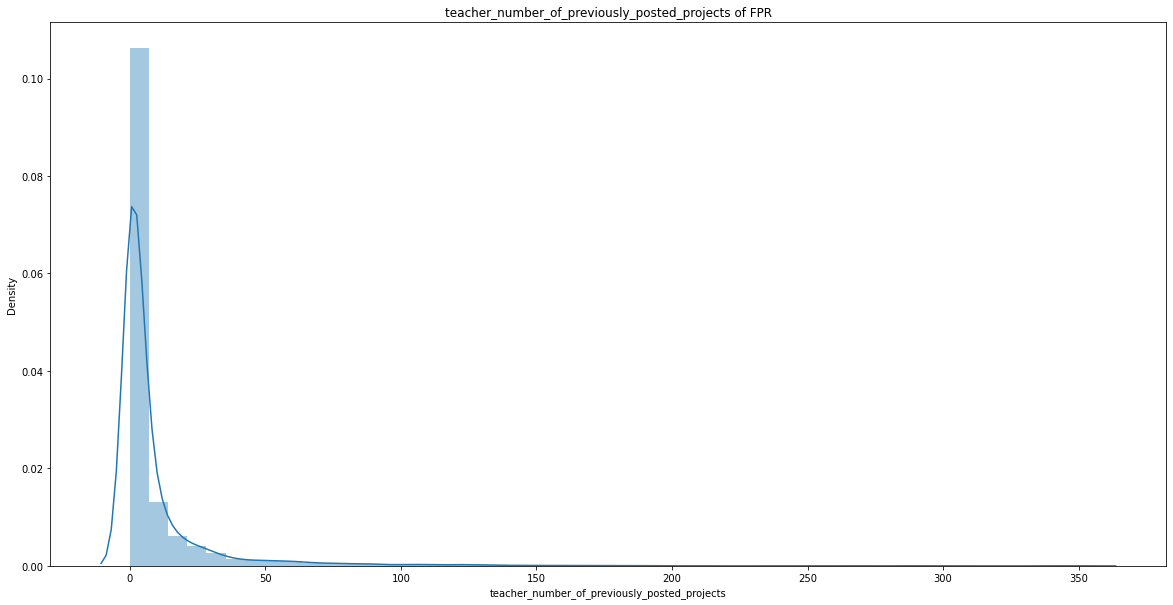

In [ ]:
previous_projects_fpr = X.teacher_number_of_previously_posted_projects.iloc[index_fpr]
plt.figure(figsize=(20,10))
sns.distplot(previous_projects_fpr)
plt.title('teacher_number_of_previously_posted_projects of FPR')

# Set-2

In [ ]:
dt = DecisionTreeClassifier()
params = {'max_depth':[1,5,10,50],'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dt,params,cv=3,scoring='roc_auc',return_train_score=True,verbose=2,n_jobs=-1)
clf.fit(X_tr_tfidf_w2v,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 26.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         '

In [ ]:
results_tfidf_w2v = pd.DataFrame.from_dict(clf.cv_results_)
results_tfidf_w2v

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.505592,0.088491,0.068663,0.000525,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.553295,0.551274,0.549627,0.551399,0.001500,11,0.553089,0.559652,0.558928,0.557223,0.002938
1,4.260623,0.110240,0.071655,0.004024,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.553295,0.551274,0.549627,0.551399,0.001500,11,0.553089,0.559652,0.558928,0.557223,0.002938
2,4.250741,0.011451,0.072309,0.002700,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.553295,0.551274,0.549627,0.551399,0.001500,11,0.553089,0.559652,0.558928,0.557223,0.002938
3,4.174969,0.011873,0.065818,0.001312,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.553295,0.551274,0.549627,0.551399,0.001500,11,0.553089,0.559652,0.558928,0.557223,0.002938
4,20.314031,0.126906,0.078608,0.008737,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.622788,0.608890,0.609688,0.613788,0.006372,2,0.647447,0.649637,0.643169,0.646751,0.002686
5,20.319926,0.020643,0.071866,0.006082,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.622788,0.608890,0.609006,0.613561,0.006524,4,0.647447,0.649637,0.642909,0.646665,0.002802
6,20.523309,0.303035,0.073551,0.007949,5,100,"{'max_depth': 5, 'min_samples_split': 100}",0.622788,0.608881,0.609688,0.613785,0.006374,3,0.647447,0.649635,0.643169,0.646750,0.002685
7,20.624675,0.027570,0.067082,0.001404,5,500,"{'max_depth': 5, 'min_samples_split': 500}",0.623447,0.608877,0.609171,0.613831,0.006800,1,0.646539,0.649611,0.642434,0.646195,0.002940
8,54.223315,1.761807,0.079841,0.007021,10,5,"{'max_depth': 10, 'min_samples_split': 5}",0.587256,0.585882,0.585034,0.586057,0.000916,9,0.755085,0.757365,0.751698,0.754716,0.002328
9,53.983005,1.455813,0.070704,0.002274,10,10,"{'max_depth': 10, 'min_samples_split': 10}",0.586755,0.586891,0.586520,0.586722,0.000153,8,0.753648,0.755577,0.750048,0.753091,0.002291


In [ ]:
x1=[1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
y1=[5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
z1=list(results_tfidf_w2v['mean_train_score'])

x2=[1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
y2=[5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
z2=list(results_tfidf_w2v['mean_test_score'])

In [ ]:
Trace1=go.Scatter3d(x=x1,y=y1,z=z1,name='Train')
Trace2=go.Scatter3d(x=x2,y=y2,z=z2,name='Cross Validation')
data=[Trace1,Trace2]

In [ ]:
layout = go.Layout(scene=dict(
    xaxis=dict(title='max_depth'),
    yaxis=dict(title='min_samples_split'),
    zaxis=dict(title='AUC_Score')))

In [ ]:
fig = go.Figure(data,layout)
fig.show(renderer='colab')

In [ ]:
#storing best parameters got from hyperparameter
best_tfidf_w2v = clf.best_params_
best_tfidf_w2v

{'max_depth': 5, 'min_samples_split': 500}

In [ ]:
#training decision tree classifier with best parameters
best_model_tfidf_w2v = DecisionTreeClassifier(max_depth=best_tfidf_w2v['max_depth'],min_samples_split=best_tfidf_w2v['min_samples_split'])
best_model_tfidf_w2v.fit(X_tr_tfidf_w2v,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# prediciton probabilites of y_train and y_test
y_pred_tfidf_w2v_train_proba=(best_model_tfidf_w2v.predict_proba(X_tr_tfidf_w2v))[:,1]
y_pred_tfidf_w2v_test_proba=(best_model_tfidf_w2v.predict_proba(X_te_tfidf_w2v))[:,1]

In [ ]:
# y_test and y_train predictions
y_train_pred_tfidf_w2v = best_model_tfidf_w2v.predict(X_tr_tfidf_w2v) 
y_test_pred_tfidf_w2v = best_model_tfidf_w2v.predict(X_te_tfidf_w2v)

Text(0, 0.5, 'TPR')

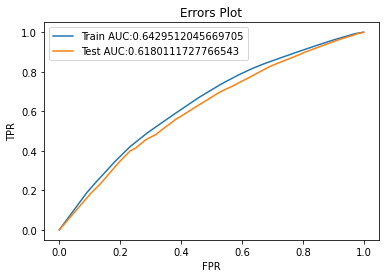

In [ ]:
# plotting roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_pred_tfidf_w2v_train_proba)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_pred_tfidf_w2v_test_proba)
plt.plot(train_fpr,train_tpr,label="Train AUC:"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC:"+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.title('Errors Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
tfidf_w2v_auc_score = auc(test_fpr,test_tpr)

Text(33.0, 0.5, 'Actual')

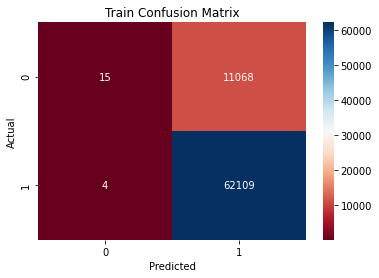

In [ ]:
#confusion matrix of train data
plt.title("Train Confusion Matrix")
cm_train_tfidf_w2v=confusion_matrix(y_train,y_train_pred_tfidf_w2v)
sns.heatmap(cm_train_tfidf_w2v,annot=True,fmt="d",cmap='RdBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')


Text(33.0, 0.5, 'Actual')

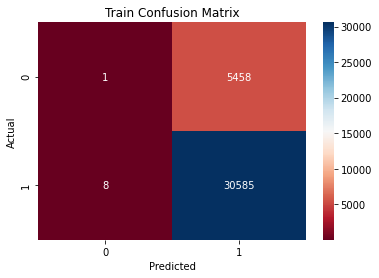

In [ ]:
#confusion matrix of test data
plt.title("Train Confusion Matrix")
cm_test_tfidf_w2v=confusion_matrix(y_test,y_test_pred_tfidf_w2v)
sns.heatmap(cm_test_tfidf_w2v,annot=True,fmt="d",cmap='RdBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [ ]:
# indicies of false positive data points
index_fpr_tfidf_w2v=[]
for i in range(len(y_train)):
  if y_train[i] == 0 and y_train_pred_tfidf_w2v[i]==1:
    index_fpr_tfidf_w2v.append(i)
for j in range(len(y_test)):
  if y_test[j]==0 and y_test_pred_tfidf_w2v[j]==1:
    index_fpr_tfidf_w2v.append(j)


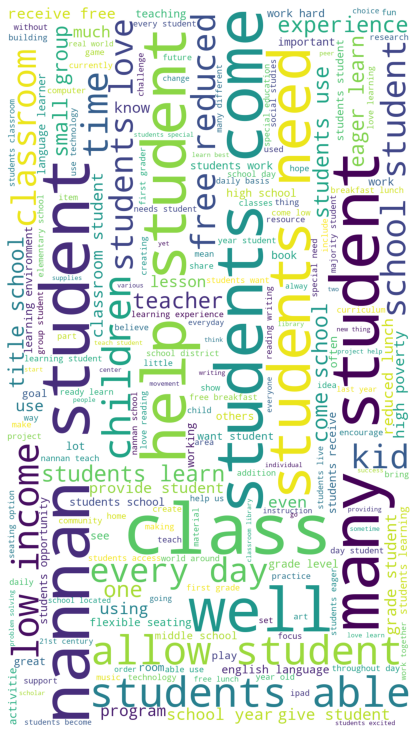

In [ ]:
# generating wordcloud
wordcloud_func(index_fpr_tfidf_w2v)

Text(0.5, 1.0, 'Price of FPR')

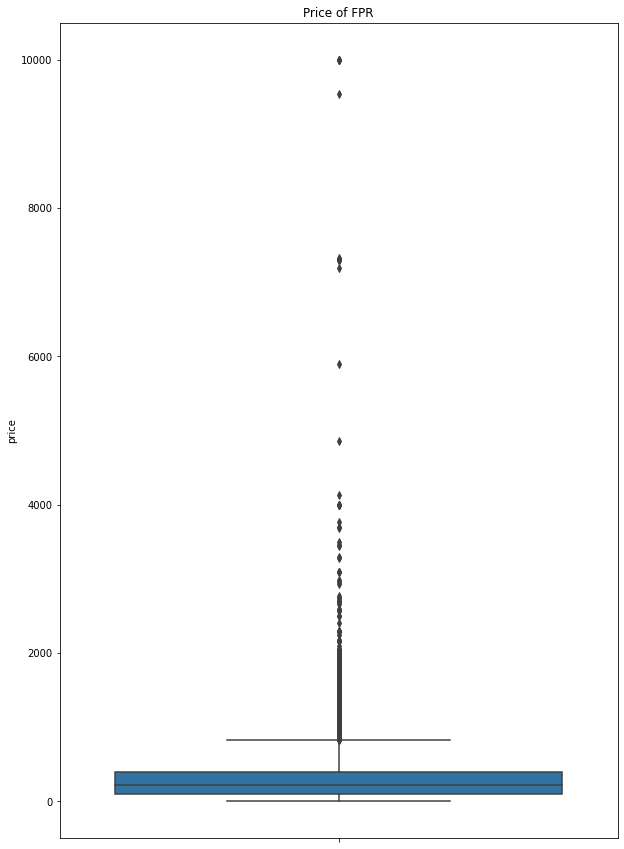

In [ ]:
price_fpr = X.price.iloc[index_fpr_tfidf_w2v]
plt.figure(figsize=(10,15))
sns.boxplot(y=price_fpr,)
plt.title('Price of FPR')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'teacher_number_of_previously_posted_projects of FPR')

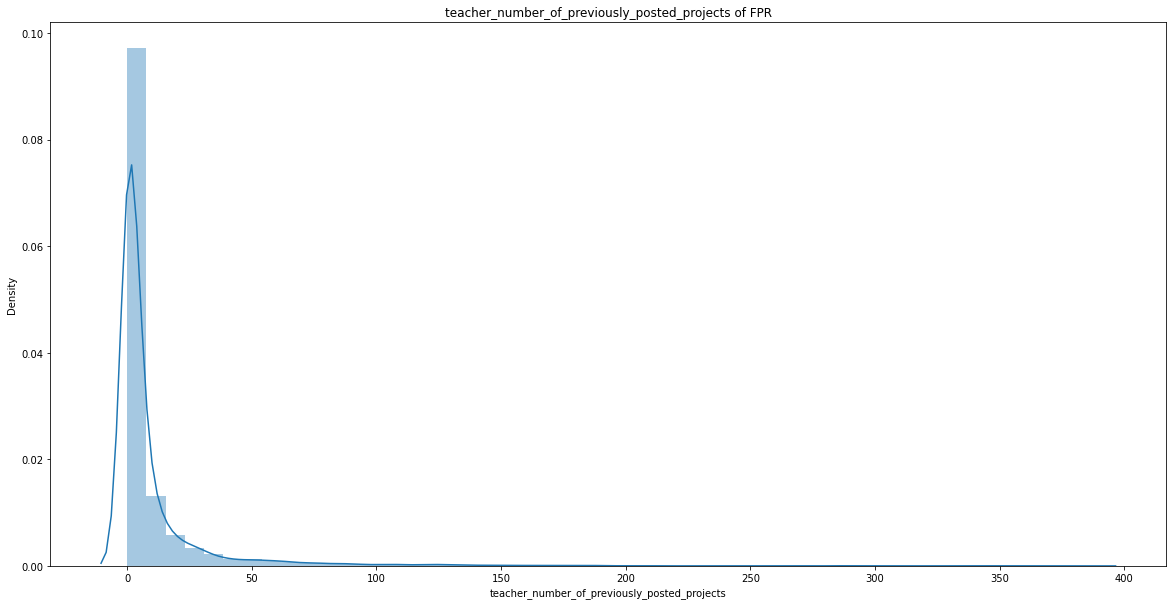

In [ ]:
previous_projects_fpr = X.teacher_number_of_previously_posted_projects.iloc[index_fpr_tfidf_w2v]
plt.figure(figsize=(20,10))
sns.distplot(previous_projects_fpr)
plt.title('teacher_number_of_previously_posted_projects of FPR')

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [ ]:
feature_imp=best_model_tfidf_w2v.feature_importances_
feature_non_zero = np.where(feature_imp!=0)

In [ ]:
len(feature_non_zero[0])

24

In [ ]:
X_train_important_features = X_tr_tfidf_w2v[:,feature_non_zero[0]]
X_test_important_features = X_te_tfidf_w2v[:,feature_non_zero[0]]

In [ ]:
dt = DecisionTreeClassifier()
params = {'max_depth':[1,5,10,50],'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dt,params,cv=3,scoring='roc_auc',return_train_score=True,verbose=2,n_jobs=-1)
clf.fit(X_train_important_features,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         '

In [ ]:
results_tfidf_w2v_impfeatures = pd.DataFrame.from_dict(clf.cv_results_)
results_tfidf_w2v_impfeatures

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.337958,0.011788,0.024246,0.009186,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.553295,0.551274,0.549627,0.551399,0.001500,11,0.553089,0.559652,0.558928,0.557223,0.002938
1,0.335046,0.015808,0.024827,0.005229,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.553295,0.551274,0.549627,0.551399,0.001500,11,0.553089,0.559652,0.558928,0.557223,0.002938
2,0.338302,0.013811,0.022842,0.007830,1,100,"{'max_depth': 1, 'min_samples_split': 100}",0.553295,0.551274,0.549627,0.551399,0.001500,11,0.553089,0.559652,0.558928,0.557223,0.002938
3,0.334442,0.004372,0.025069,0.005718,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.553295,0.551274,0.549627,0.551399,0.001500,11,0.553089,0.559652,0.558928,0.557223,0.002938
4,1.555657,0.013934,0.022942,0.004689,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.618903,0.613473,0.614527,0.615634,0.002351,4,0.643335,0.646593,0.639752,0.643226,0.002794
5,1.586403,0.010782,0.027081,0.005023,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.618903,0.613473,0.614527,0.615634,0.002351,4,0.643335,0.646593,0.639752,0.643226,0.002794
6,1.589699,0.014902,0.024224,0.004730,5,100,"{'max_depth': 5, 'min_samples_split': 100}",0.618945,0.613473,0.614527,0.615648,0.002370,3,0.643294,0.646593,0.639752,0.643213,0.002793
7,1.583518,0.018898,0.027000,0.004630,5,500,"{'max_depth': 5, 'min_samples_split': 500}",0.619380,0.613096,0.614528,0.615668,0.002689,2,0.643069,0.646264,0.639748,0.643027,0.002660
8,4.346323,0.126467,0.027385,0.005746,10,5,"{'max_depth': 10, 'min_samples_split': 5}",0.602910,0.596660,0.600914,0.600162,0.002606,9,0.734731,0.740215,0.739976,0.738307,0.002531
9,4.309764,0.142258,0.029558,0.005581,10,10,"{'max_depth': 10, 'min_samples_split': 10}",0.605159,0.596892,0.601926,0.601326,0.003402,8,0.732311,0.738110,0.737389,0.735937,0.002581


In [ ]:
best_tfidf_w2v_impfeatures = clf.best_params_
best_tfidf_w2v_impfeatures

{'max_depth': 10, 'min_samples_split': 500}

In [ ]:
x1=[1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
y1=[5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
z1=list(results_tfidf_w2v_impfeatures['mean_train_score'])

x2=[1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50]
y2=[5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500]
z2=list(results_tfidf_w2v_impfeatures['mean_test_score'])

In [ ]:
Trace1=go.Scatter3d(x=x1,y=y1,z=z1,name='Train')
Trace2=go.Scatter3d(x=x2,y=y2,z=z2,name='Cross Validation')
data=[Trace1,Trace2]

In [ ]:
layout = go.Layout(scene=dict(
    xaxis=dict(title='max_depth'),
    yaxis=dict(title='min_samples_split'),
    zaxis=dict(title='AUC_Score')))

In [ ]:
fig = go.Figure(data,layout)
fig.show(renderer='colab')

In [ ]:
best_model_tfidf_w2v_impfeatures = DecisionTreeClassifier(max_depth=best_tfidf_w2v_impfeatures['max_depth'],min_samples_split=best_tfidf_w2v_impfeatures['min_samples_split'])
best_model_tfidf_w2v_impfeatures.fit(X_train_important_features,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_tfidf_w2v_train_impfeatures_proba=(best_model_tfidf_w2v_impfeatures.predict_proba(X_train_important_features))[:,1]
y_pred_tfidf_w2v_test_impfeatures_proba=(best_model_tfidf_w2v_impfeatures.predict_proba(X_test_important_features))[:,1]

In [ ]:
y_train_pred_imp_features = best_model_tfidf_w2v_impfeatures.predict(X_train_important_features) 
y_test_pred_imp_features =  best_model_tfidf_w2v_impfeatures.predict(X_test_important_features)

Text(0, 0.5, 'TPR')

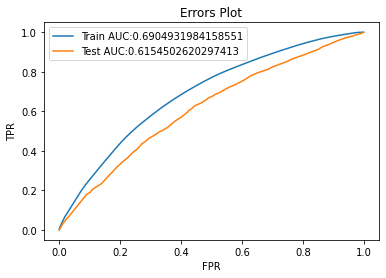

In [ ]:
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_pred_tfidf_w2v_train_impfeatures_proba)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_pred_tfidf_w2v_test_impfeatures_proba)

plt.plot(train_fpr,train_tpr,label="Train AUC:"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC:"+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.title('Errors Plot')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
tfidf_w2v_imp_features_auc_score = auc(test_fpr,test_tpr)

Text(33.0, 0.5, 'Actual')

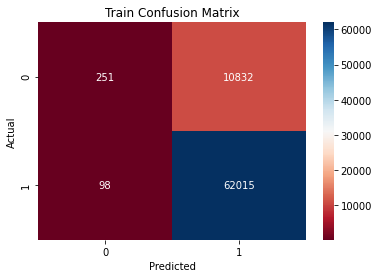

In [ ]:
plt.title("Train Confusion Matrix")
cm_train_tfidf_w2v_impfeatures=confusion_matrix(y_train,y_train_pred_imp_features)
sns.heatmap(cm_train_tfidf_w2v_impfeatures,annot=True,fmt="d",cmap='RdBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')


Text(33.0, 0.5, 'Actual')

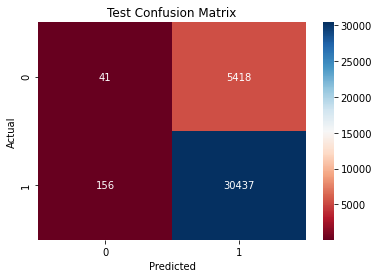

In [ ]:
plt.title('Test Confusion Matrix')
cm_test_tfidf_w2v_impfeatures=confusion_matrix(y_test,y_test_pred_imp_features)
sns.heatmap(cm_test_tfidf_w2v_impfeatures,annot=True,fmt="d",cmap='RdBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
index_fpr_imp_features=[]
for i in range(len(y_train)):
  if y_train[i] == 0 and y_train_pred_imp_features[i]==1:
    index_fpr_imp_features.append(i)
for j in range(len(y_test)):
  if y_test[j]==0 and y_test_pred_imp_features[j]==1:
    index_fpr_imp_features.append(j)

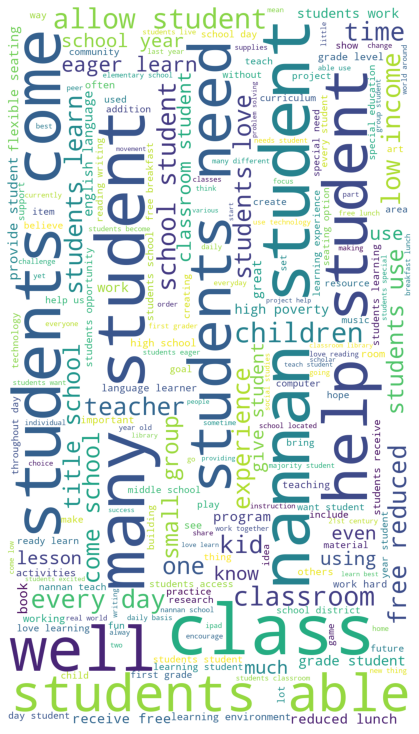

In [ ]:
wordcloud_func(index_fpr_imp_features)

Text(0.5, 1.0, 'Price of FPR')

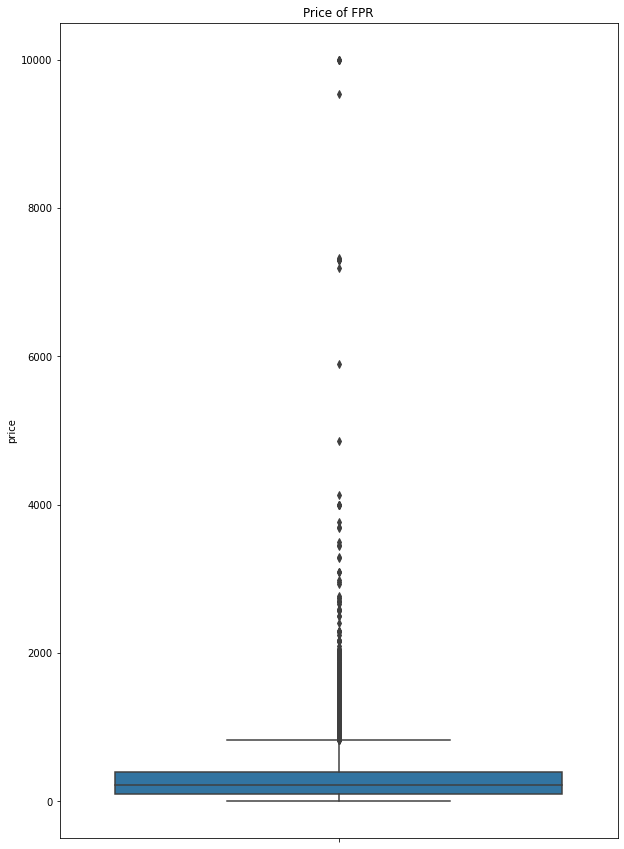

In [ ]:
price_fpr = X.price.iloc[index_fpr_imp_features]
plt.figure(figsize=(10,15))
sns.boxplot(y=price_fpr,)
plt.title('Price of FPR')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'teacher_number_of_previously_posted_projects of FPR')

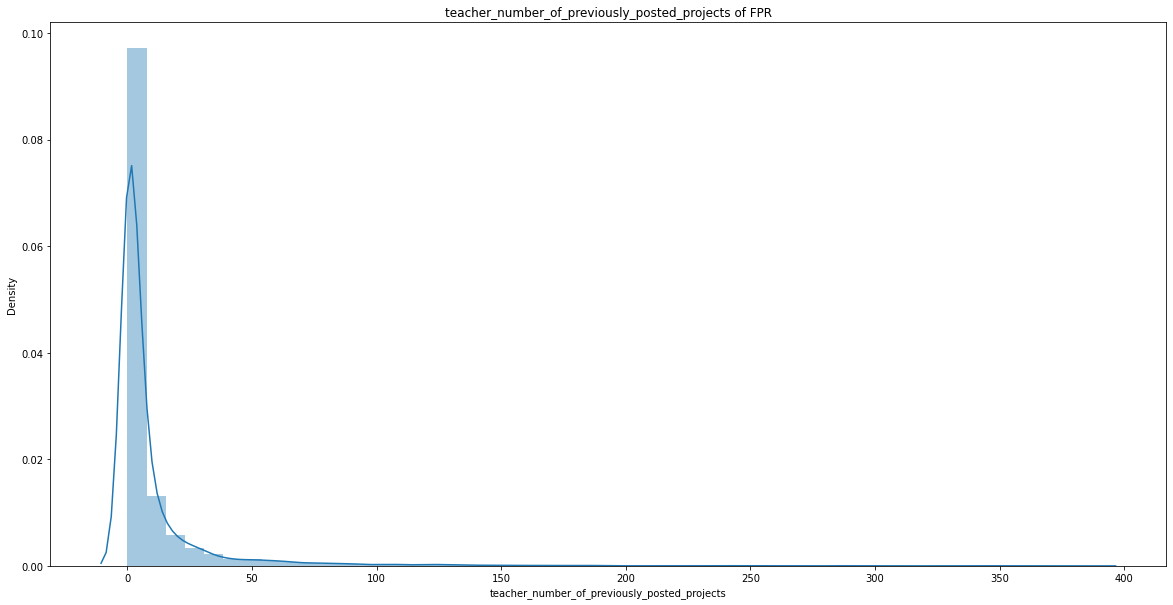

In [ ]:
previous_projects_fpr = X.teacher_number_of_previously_posted_projects.iloc[index_fpr_imp_features]
plt.figure(figsize=(20,10))
sns.distplot(previous_projects_fpr)
plt.title('teacher_number_of_previously_posted_projects of FPR')

In [90]:
from prettytable import PrettyTable

table = PrettyTable(['Vectorizer','Model','Hyper Parameter','AUC'])
table.add_row(['TFIDF','Desition Tree',best,tfidf_auc_score])
table.add_row(['TFIDF-W2V','Decision Tree',best_tfidf_w2v,tfidf_w2v_auc_score])
table.add_row(['TFIDF-W2V-Important-Features','Decision Tree',best_tfidf_w2v_impfeatures,tfidf_w2v_imp_features_auc_score])
print(table)

+------------------------------+---------------+---------------------------------------------+--------------------+
|          Vectorizer          |     Model     |               Hyper Parameter               |        AUC         |
+------------------------------+---------------+---------------------------------------------+--------------------+
|            TFIDF             | Desition Tree | {'max_depth': 10, 'min_samples_split': 500} | 0.6252422148754592 |
|          TFIDF-W2V           | Decision Tree |  {'max_depth': 5, 'min_samples_split': 500} | 0.6180111727766543 |
| TFIDF-W2V-Important-Features | Decision Tree | {'max_depth': 10, 'min_samples_split': 500} | 0.6154502620297413 |
+------------------------------+---------------+---------------------------------------------+--------------------+
